<a href="https://colab.research.google.com/github/laaksonenl/machine-learning/blob/master/random_statistics_scratchpad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'Hypothesis = event has a probability of 60% or more'

'The probability of this hypothesis 0.1'

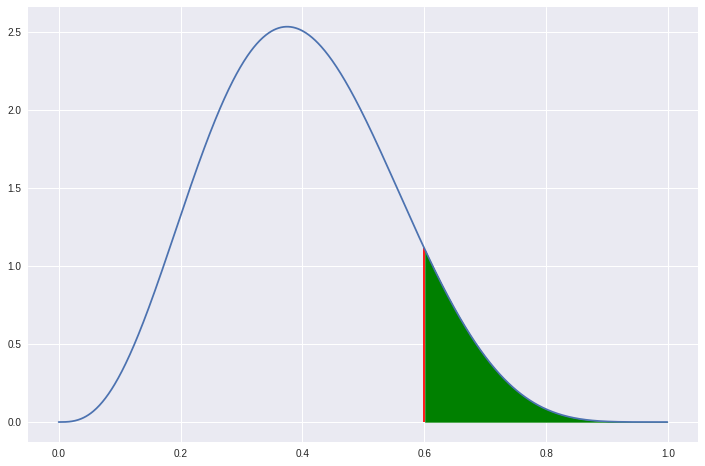

In [ ]:
import numpy as np
from scipy.stats import beta, norm
import matplotlib.pyplot as plt

alpha = 4.0
beta_ = 6.0
p_limit = 0.6

plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)

x = np.arange (0, 1, 0.001)
y = beta(alpha, beta_)

plt.vlines(x=p_limit, ymin=0, ymax=y.pdf(p_limit), color='red')
plt.fill_between(x, y.pdf(x), where = x > p_limit, color='g')
plt.plot(x,y.pdf(x))

display('Hypothesis = event has a probability of 60% or more')
display('The probability of this hypothesis {:.1f}'.format(1 - y.cdf(p_limit)))

'Probability of interval 0.31'

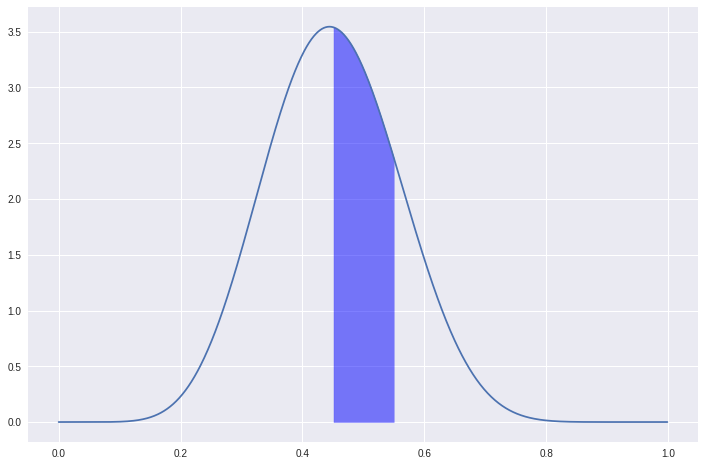

In [ ]:
alpha = 9.0
beta_ = 11.0

y = beta(alpha, beta_)

limit = 0.5
deviation = 0.05
plt.fill_between(x, y.pdf(x), where=(x > limit - deviation) & (x <= limit + deviation), color='b', alpha=0.5)
plt.plot(x,y.pdf(x))

display('Probability of interval {:.2}'.format(y.cdf(limit + deviation) - y.cdf(limit - deviation)))

(0.04255999999999998, 4.725109192804664e-16)


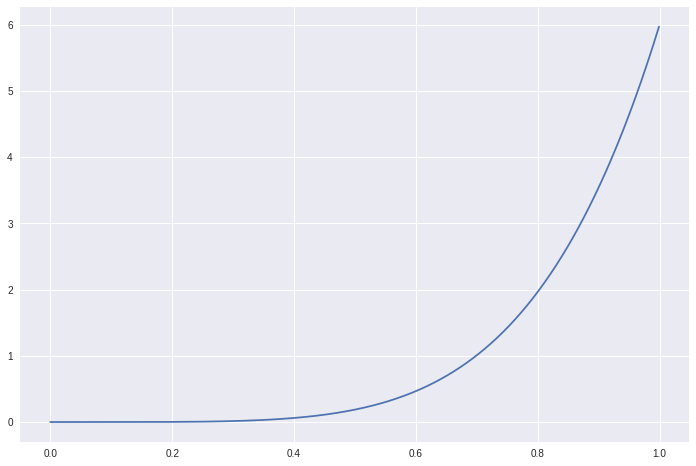

In [ ]:
# 6 heads
# and then 1 tail
alpha = 6
beta_ = 1

x = np.arange (0, 1, 0.001)
y = beta(alpha, beta_)

plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(x,y.pdf(x))

# True probability of getting heads between 0.4 and 0.6 is
from scipy import integrate
result = integrate.quad(lambda x: y.pdf(x), 0.4, 0.6)
print(result)
# 0.0425 of chance that coin is fair (probability of heads is between 0.4 and 0.6)

(0.9527469094270802, 1.4524663022109647e-11)


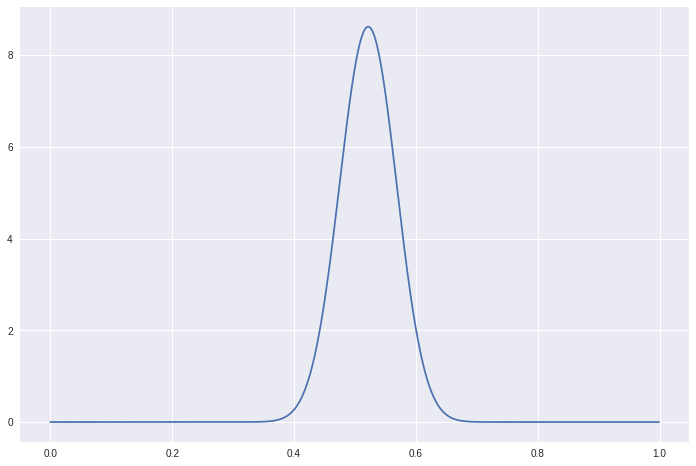

In [ ]:
# Prior = coin is fair
# There should be at least 95% chance true rate being between 0.4 and 0.6
# The larger the alpha and beta values are, the stronger and reliable the prior belief is
prior_alpha = 55
prior_beta = 55
heads = 6
tails = 1

posterior = beta(prior_alpha + heads, prior_beta + tails)
plt.plot(x, posterior.pdf(x))

from scipy import integrate
result = integrate.quad(lambda x: posterior.pdf(x), 0.4, 0.6)
print(result) 

(0.49540589807539454, 5.246459098360555e-11)


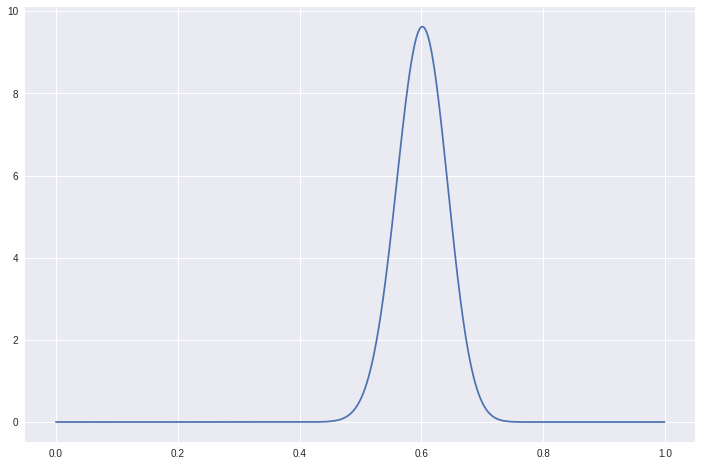

In [ ]:
# How many heads more would make you believe that coin is not fair
# For example, when chance drops under 50%

heads = 29
tails = 1

posterior = beta(prior_alpha + heads, prior_beta + tails)
plt.plot(x, posterior.pdf(x))

from scipy import integrate
result = integrate.quad(lambda x: posterior.pdf(x), 0.4, 0.6)
print(result) # 29 heads = 0.495 chance of true rate of heads being between 0.4 and 0.6

Sample mean 8.20 +/- 1.07


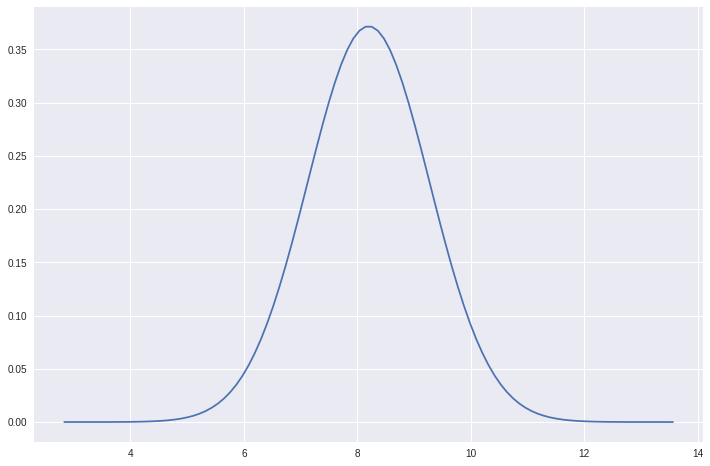

In [ ]:
# Figure out the true value
observed_values = np.array([7.9, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4])

# These are the only things we know so let's use normal distribution
sample_mean = observed_values.mean()
sample_deviation = observed_values.std()
print("Sample mean {:.2f} +/- {:.2f}".format(sample_mean, sample_deviation))

x_vals = np.linspace(sample_mean - 5 * sample_deviation, sample_mean + 5 * sample_deviation, 100)
pdf = norm.pdf(x_vals, sample_mean, sample_deviation)
plt.plot(x_vals, pdf)
plt.show()

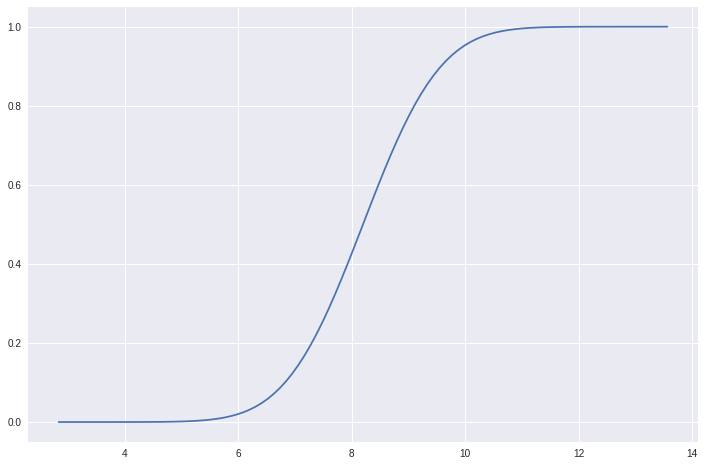

Confidence interval of 99.9 percent (4.67, 11.73)


In [ ]:
# Calculate 99.9 percent confidence interval
cdf = norm.cdf(x_vals, sample_mean, sample_deviation)
plt.plot(x_vals, cdf)
plt.show()

# ppf = inverse of cdf, projection of x given y
upper_confidence_boundary = norm.ppf(1 - 0.0005, sample_mean, sample_deviation)
lower_confidence_boundary = norm.ppf(0.0005, sample_mean, sample_deviation)

print("Confidence interval of 99.9 percent ({:.2f}, {:.2f})".format(lower_confidence_boundary, upper_confidence_boundary))

Confidence interval of 95 percent (0.17938364923511183, 0.50832335380999)
Out of 40 more, the expected subscribers with 95% confidence is (7.175345969404473, 20.332934152399602)


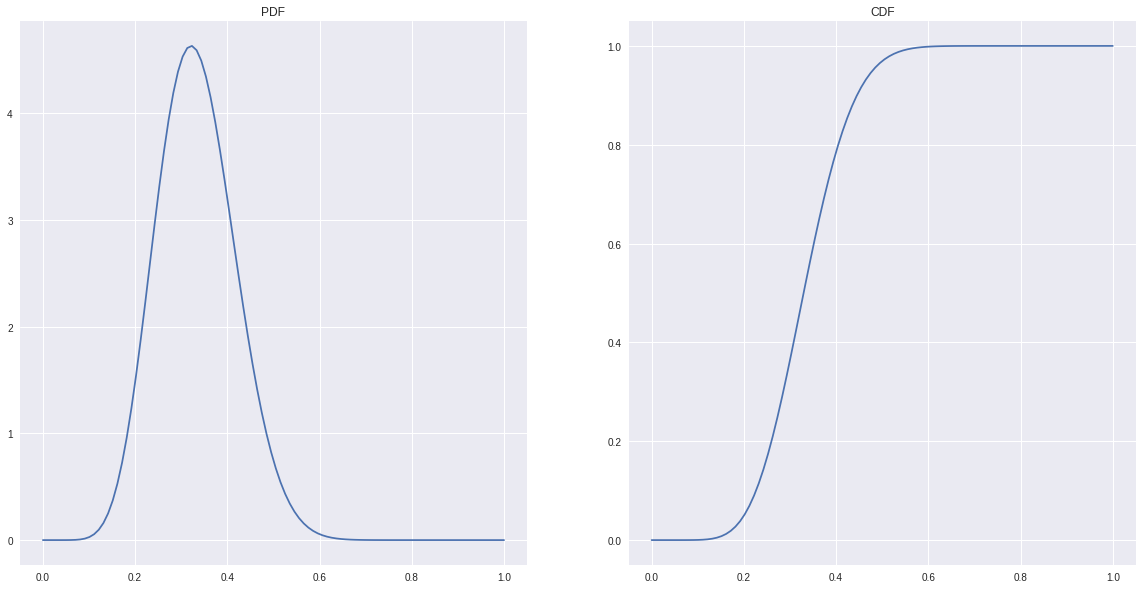

In [ ]:
# 30 visitors on site
# 10 of them subscribed
# 40 more will visit, what's the 95% confidence interval for how many will still subscribe?

alpha = 10
beta_ = 20
new_ = 40

x = np.linspace(0.0, 1.0, 100)
fig, axises = plt.subplots(1, 2, figsize=(20,10))

axises[0].set_title("PDF")
axises[0].plot(x, beta.pdf(x, alpha, beta_))

axises[1].set_title("CDF")
axises[1].plot(x, beta.cdf(x, alpha, beta_))

upper_confidence_boundary = beta.ppf(1 - 0.025, alpha, beta_)
lower_confidence_boundary = beta.ppf(0.025, alpha, beta_)
print("Confidence interval of 95 percent ({}, {})".format(lower_confidence_boundary, upper_confidence_boundary))

lower_subs = new_ * lower_confidence_boundary
upper_subs = new_ * upper_confidence_boundary

print("Out of 40 more, the expected subscribers with 95% confidence is ({}, {})".format(lower_subs, upper_subs))